# Import for Data Cleaning and Visualization

In [35]:
# For data cleaning
import pandas as pd
import numpy as np

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes = True)

In [36]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data Preprocessing

In [37]:
# Checking the unique values from all of the object datatype
df.select_dtypes(include = 'object').nunique()

Gender             2
Occupation        11
BMI Category       4
Blood Pressure    25
Sleep Disorder     3
dtype: int64

In [38]:
# Drop identifier column like 'Person ID'
df.drop(columns = 'Person ID', inplace = True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Unique Value Checking Session

In [39]:
# Check 'BMI Category' Unique Value
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [40]:
# Replace 'Normal Weight' with 'Normal' in 'BMI Category' column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [41]:
# Check 'Occupation' Unique Value
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

# Exploratory Data Analysis

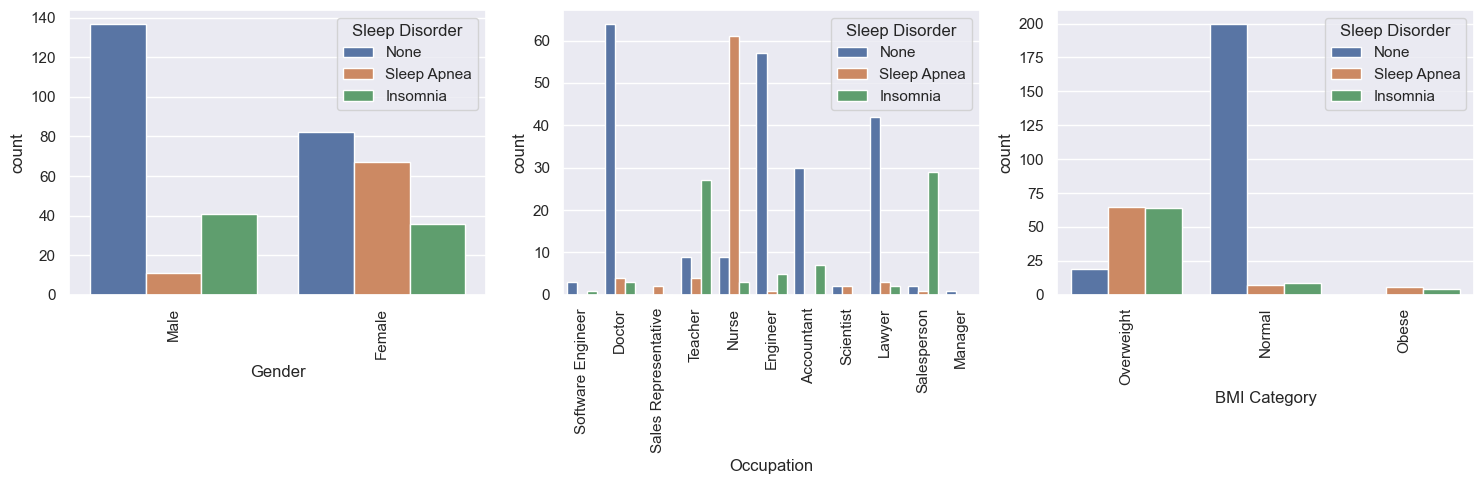

In [42]:
# List of categorical variables to plot
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create figure with subplots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))
axs = axs.flatten()

# Create barplots for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x = var, hue = 'Sleep Disorder', data = df, ax = axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
    
# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1520\3951496594.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cat_counts = cat_counts_top.append(cat_counts_other)


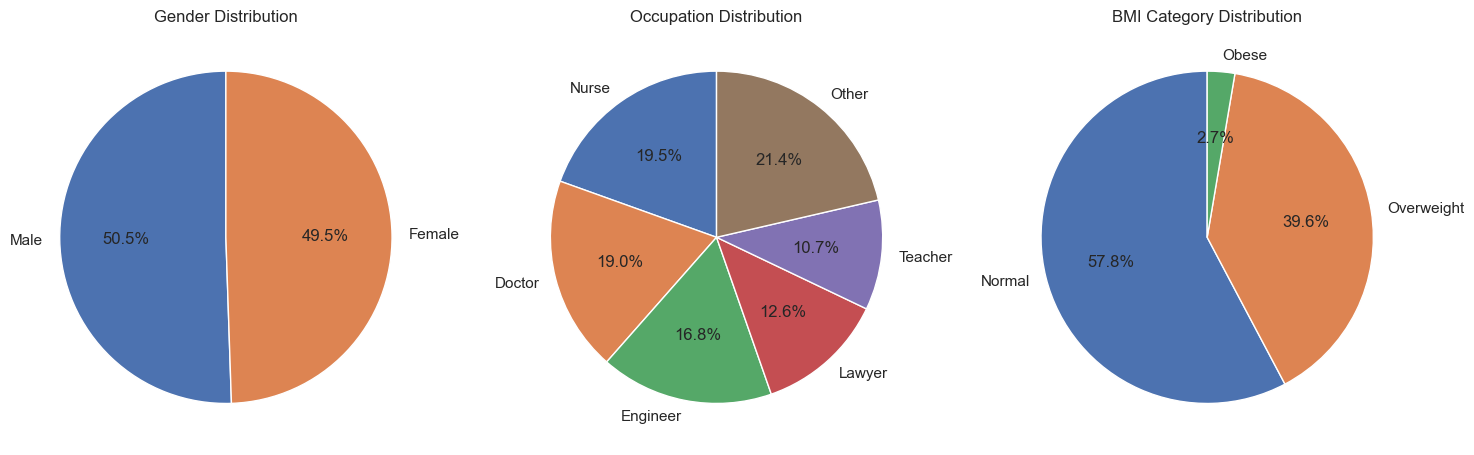

In [43]:
# Specify the maximum number of categories to show individually
max_categories = 5
cat_vars = ['Gender', 'Occupation', 'BMI Category']

# Create a figure and axes
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15,15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()
        
        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index = ['Other'])
            cat_counts = cat_counts_top.append(cat_counts_other)
            
        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels = cat_counts.index, autopct = '%1.1f%%', startangle = 90)
        
        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

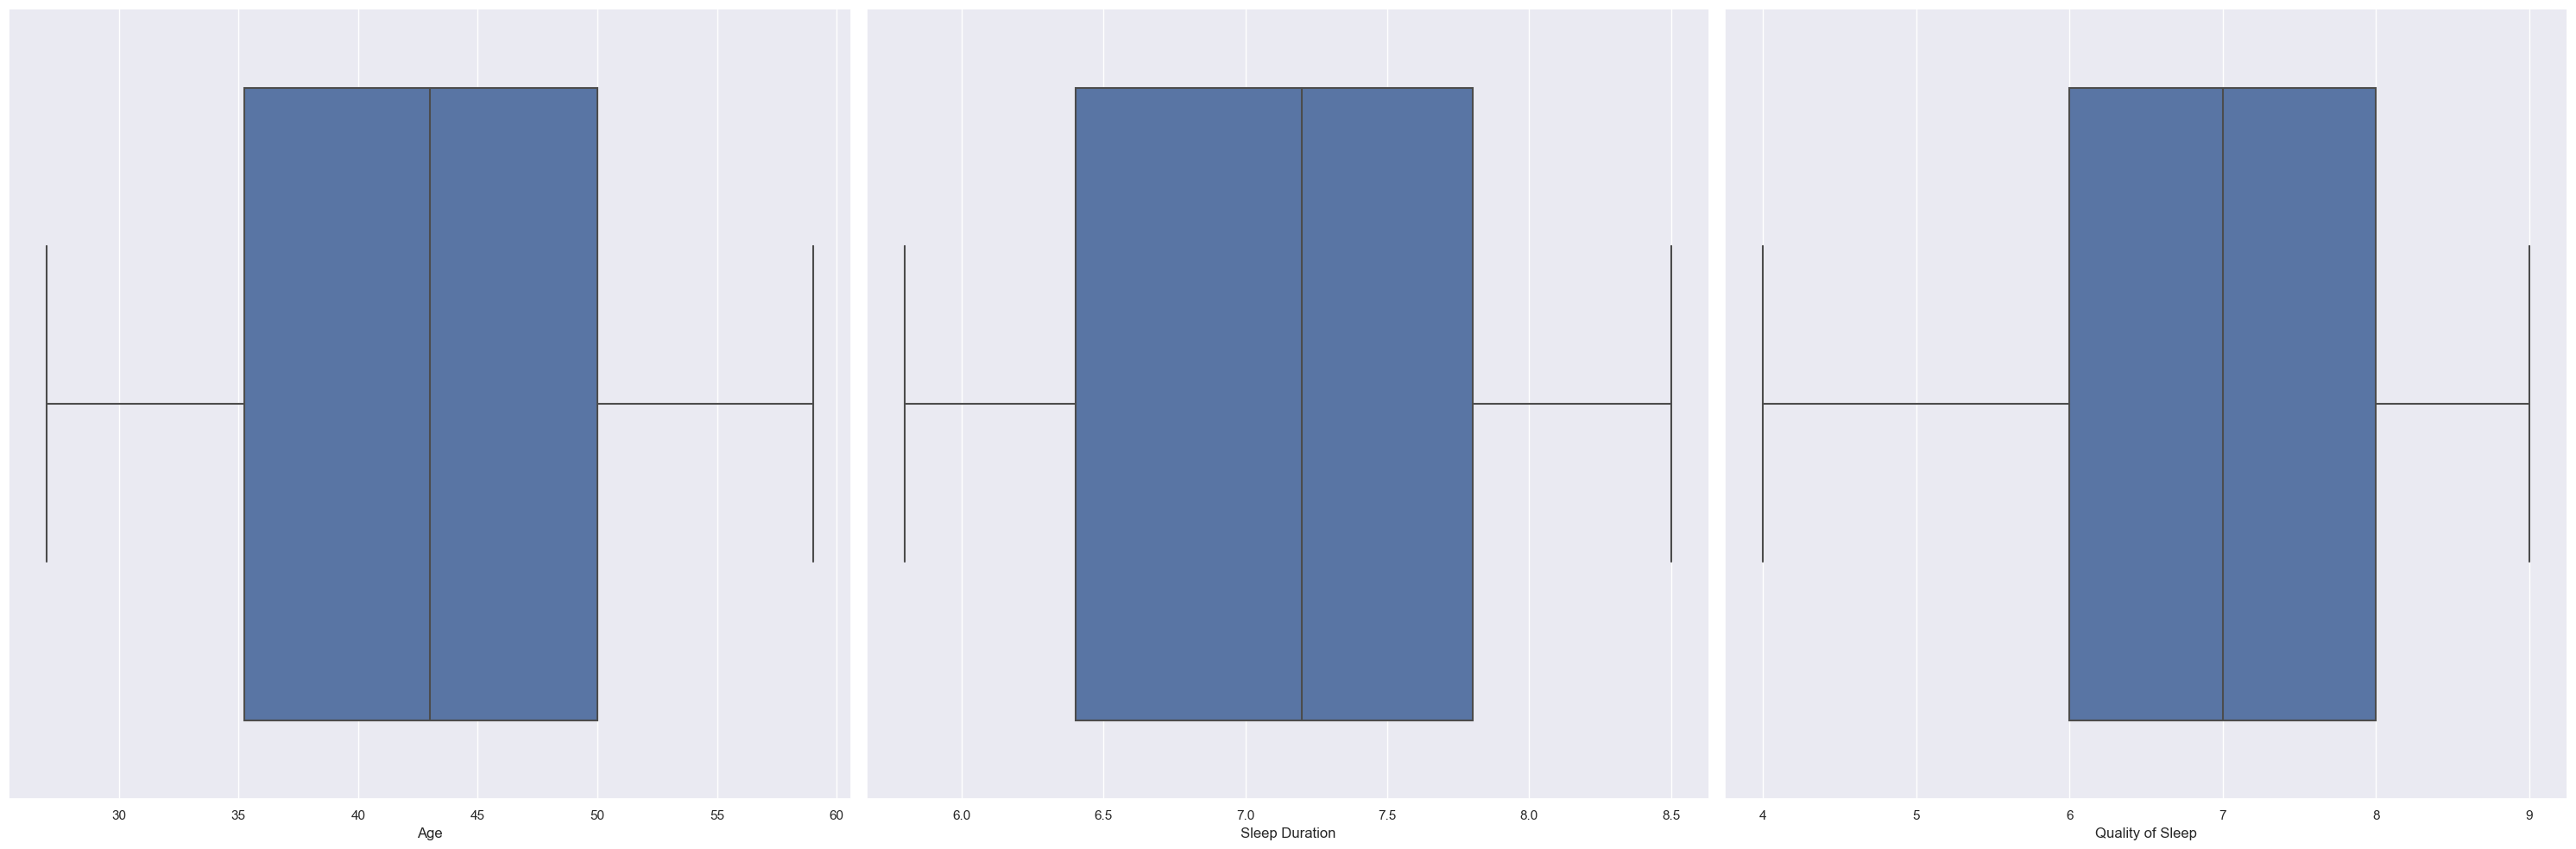

In [44]:
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep']

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize =(30,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

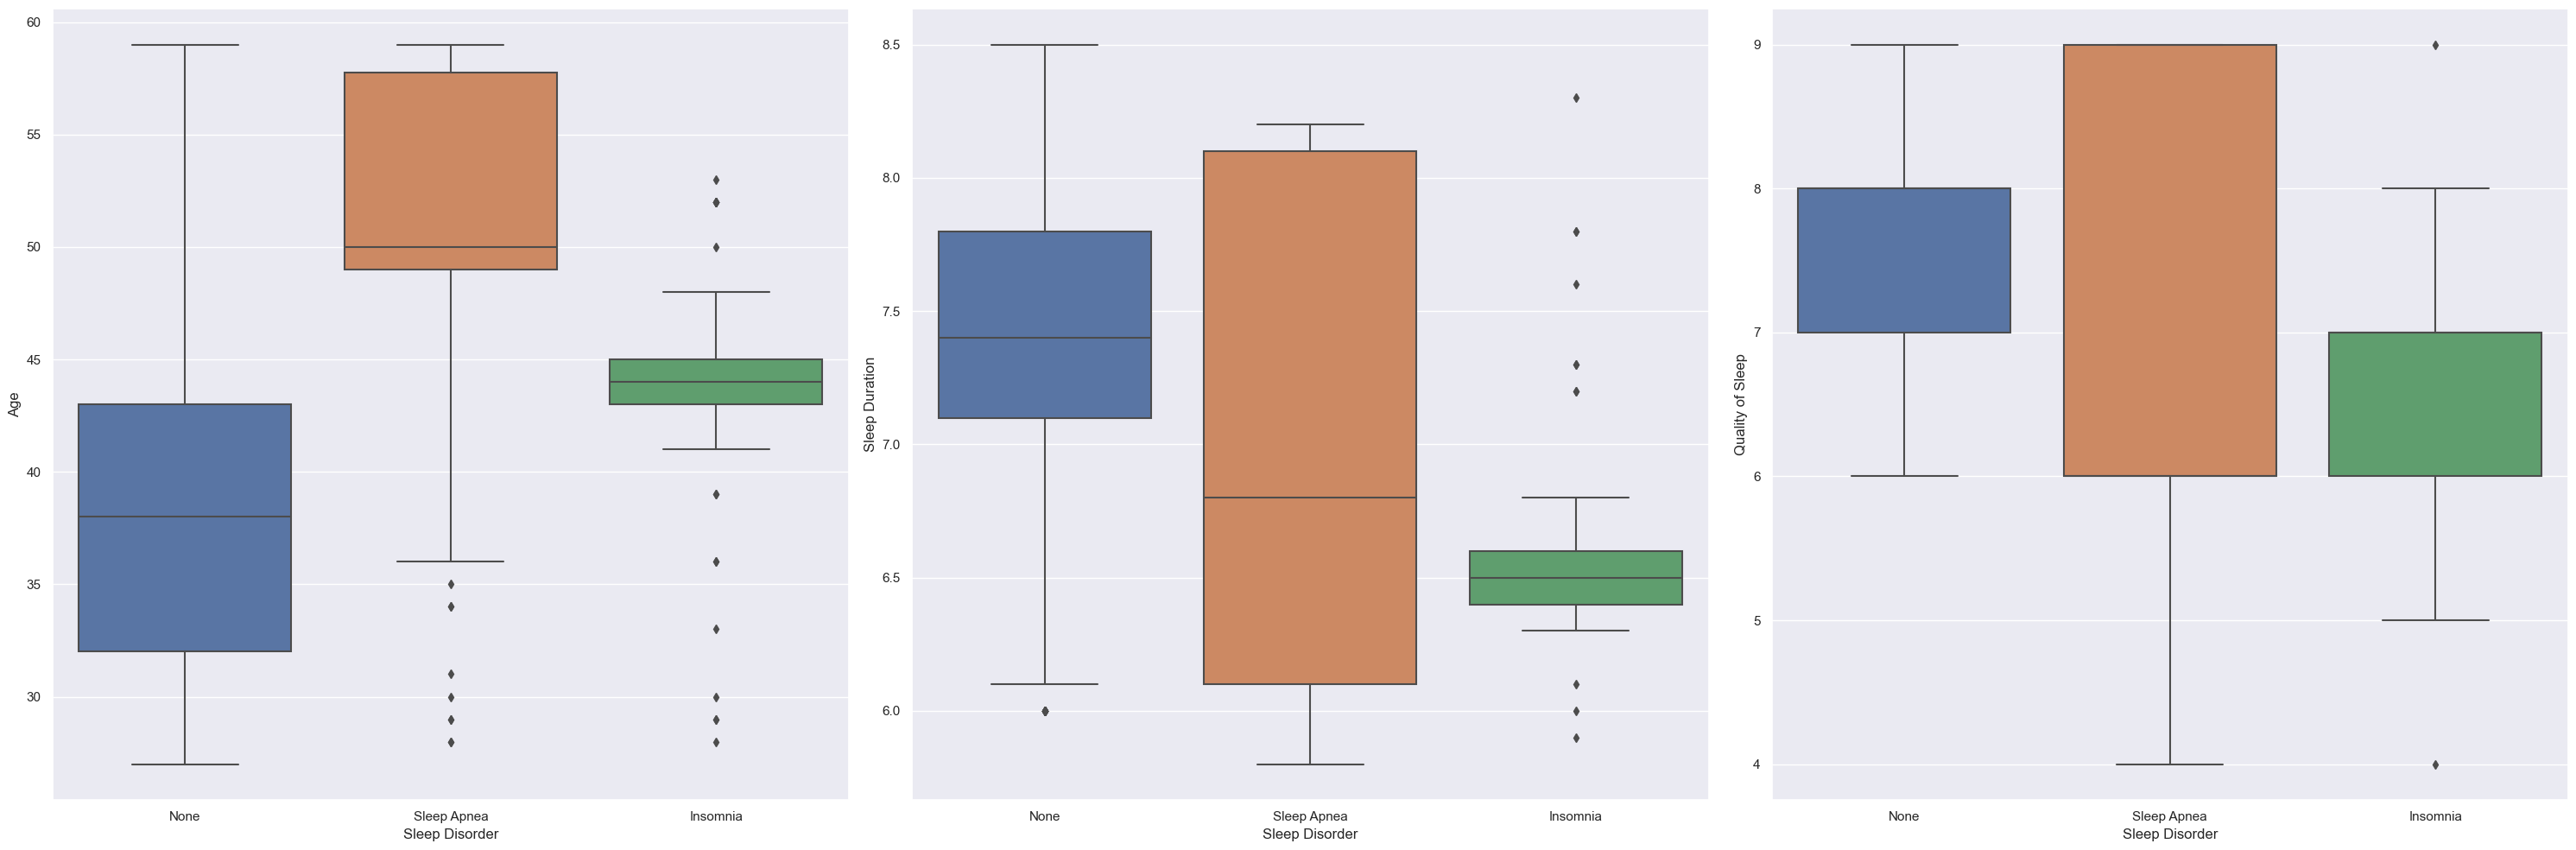

In [45]:
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Sleep Disorder', data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

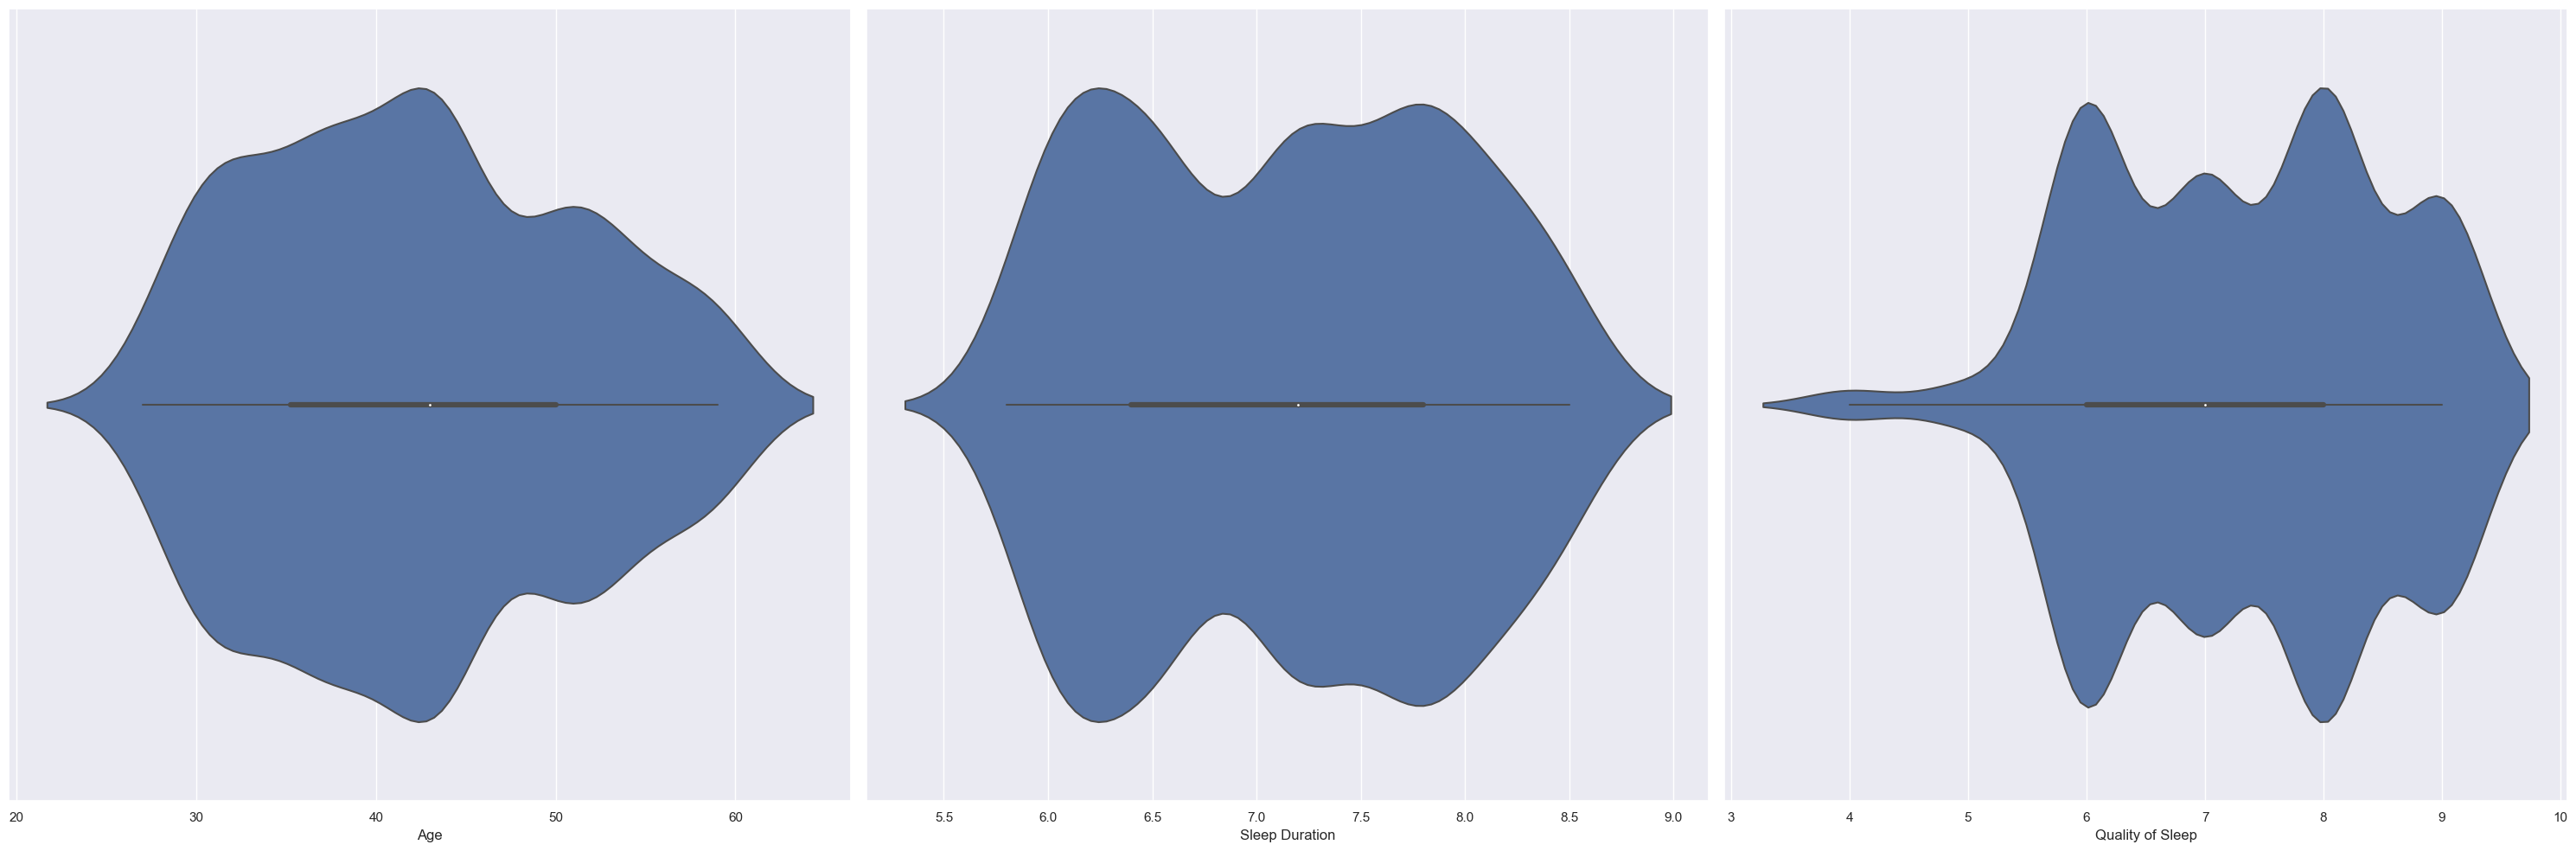

In [46]:
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])
    
fig.tight_layout()

plt.show()

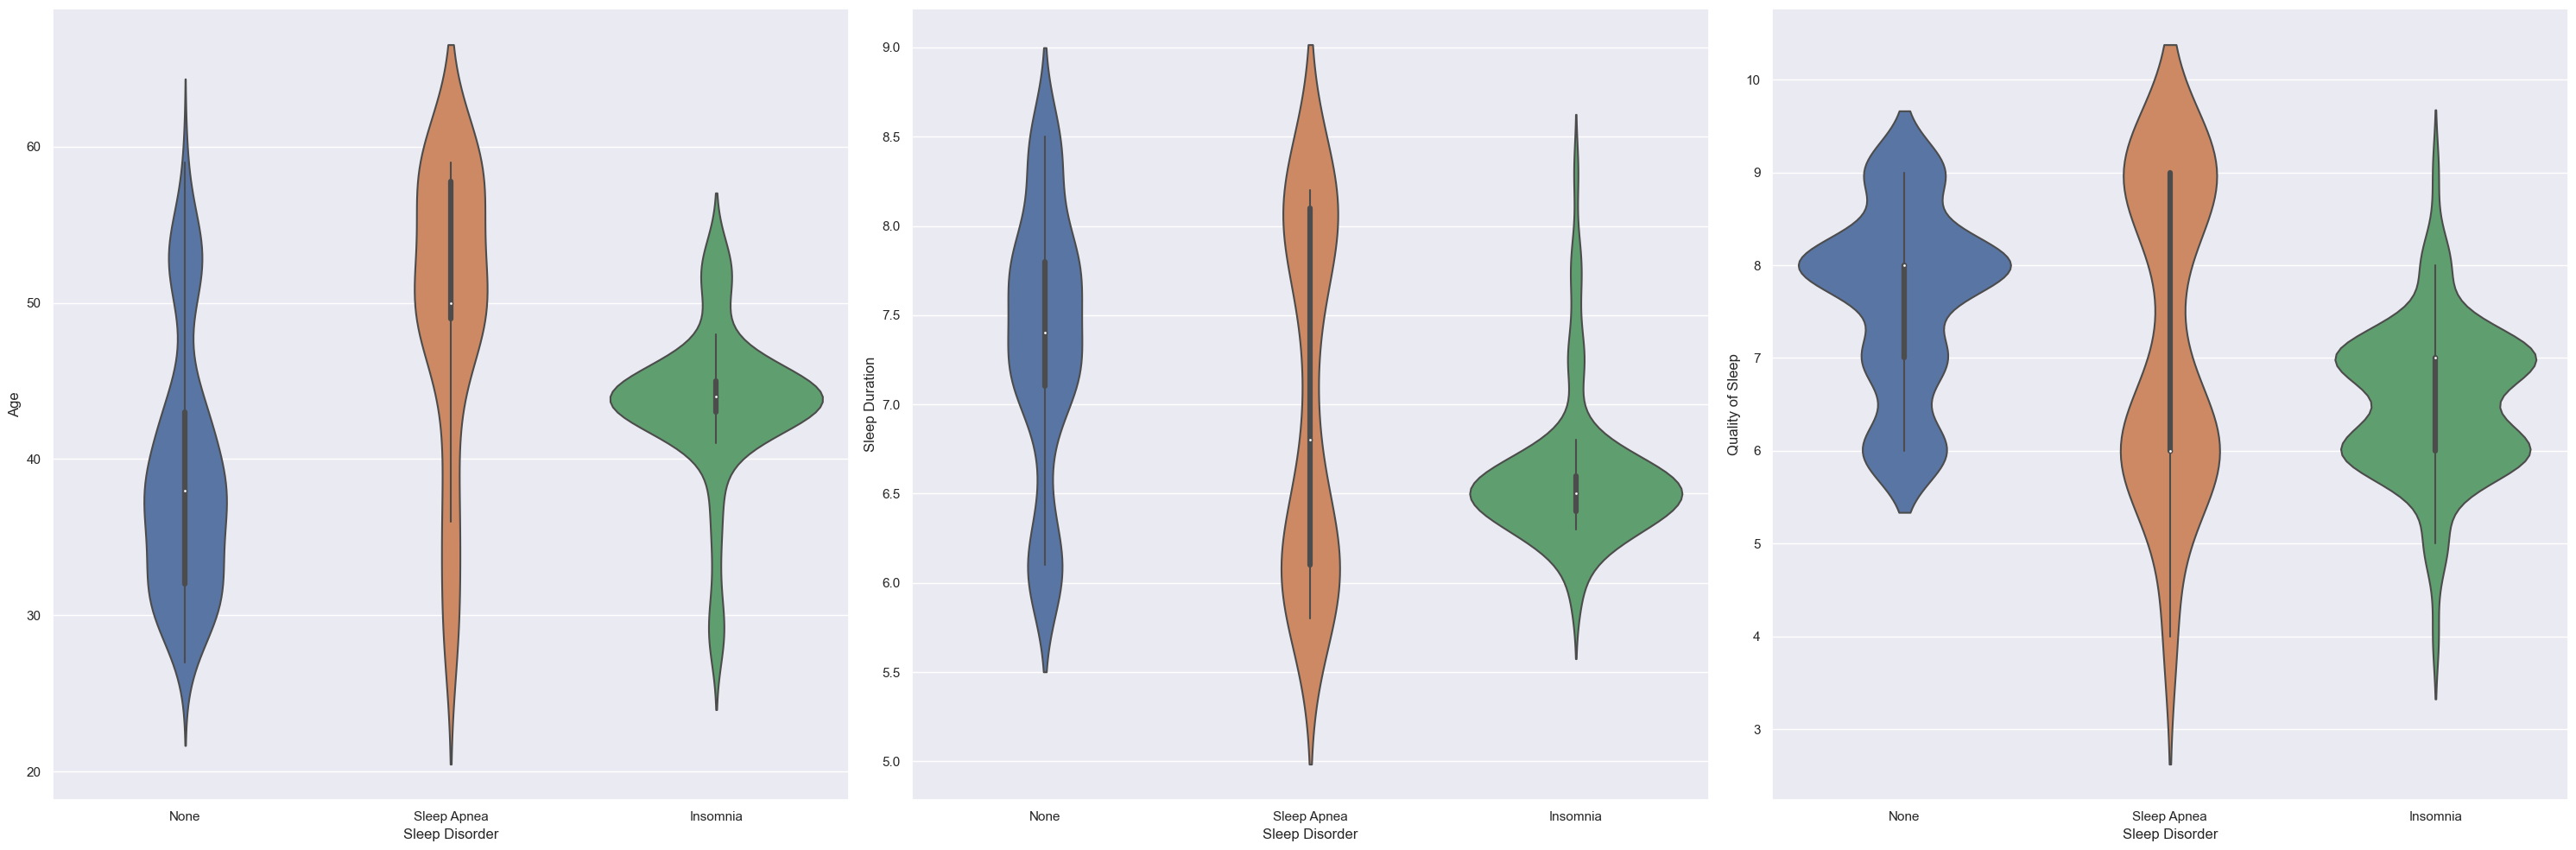

In [47]:
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Sleep Disorder', ax=axs[i])
    
fig.tight_layout()

plt.show()

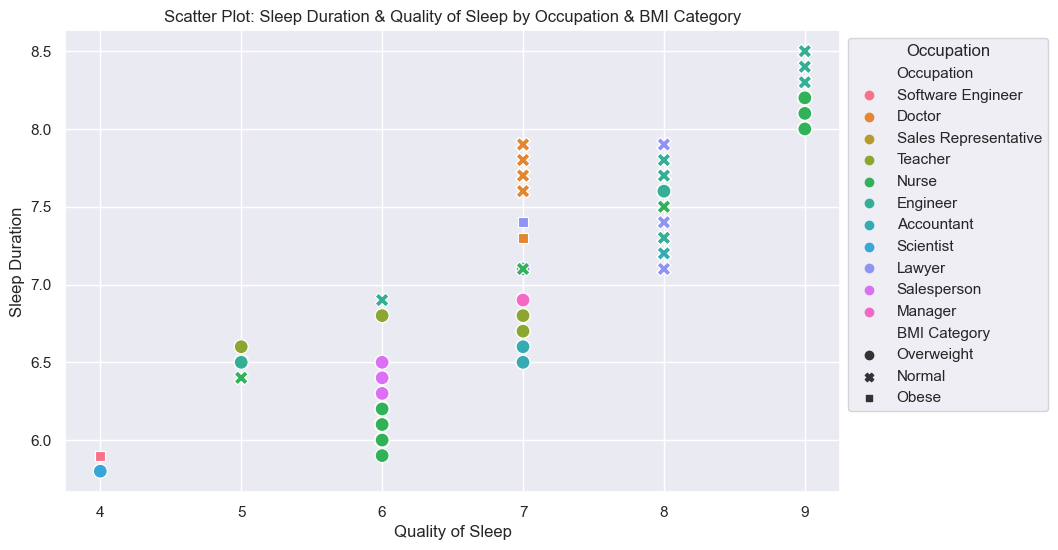

In [48]:
# Scatter plot: Sleep Duration vs. Quality of Sleep based on Occupation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quality of Sleep', y='Sleep Duration', hue='Occupation', style='BMI Category', data=df, s=100)
plt.title('Scatter Plot: Sleep Duration & Quality of Sleep by Occupation & BMI Category')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.legend(title='Occupation', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1520\1100054161.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y='Sleep Duration', data=df, ax=axs[0], estimator=sum, ci=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1520\1100054161.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_var, y='Quality of Sleep', data=df, ax=axs[1], estimator=sum, ci=None)


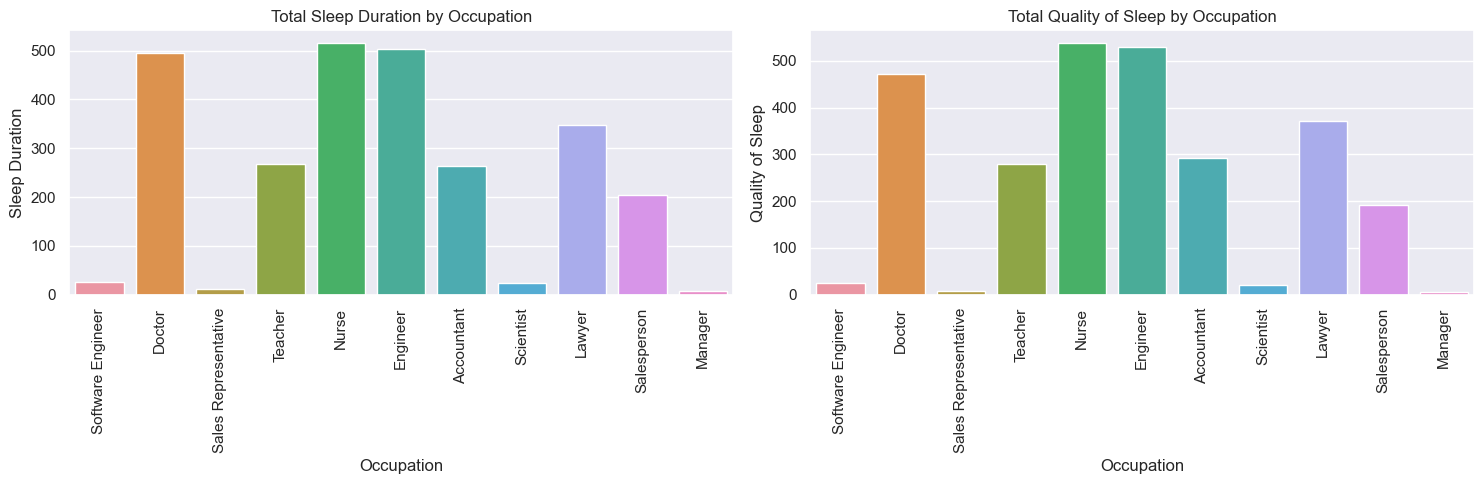

In [49]:
# List of categorical variables to plot
cat_var = 'Occupation'

# Create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axs = axs.flatten()

# Create barplots for Sleep Duration
sns.barplot(x=cat_var, y='Sleep Duration', data=df, ax=axs[0], estimator=sum, ci=None)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
axs[0].set_title('Total Sleep Duration by Occupation')

# Create barplots for Quality of Sleep
sns.barplot(x=cat_var, y='Quality of Sleep', data=df, ax=axs[1], estimator=sum, ci=None)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
axs[1].set_title('Total Quality of Sleep by Occupation')

# Show plot
plt.tight_layout()
plt.show()

# Heatmap Correlation

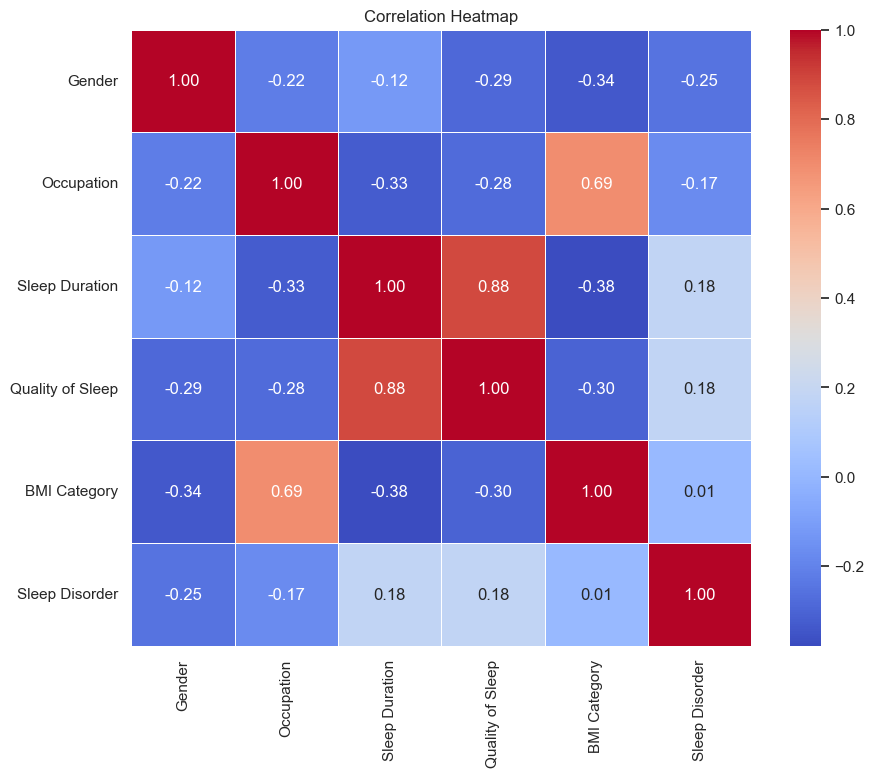

In [50]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
# Convertion categorical column to the numerical column with Label Encoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])

# Select columns to use in heatmap
selected_columns = ['Gender', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'BMI Category', 'Sleep Disorder']

# Count the correlation between columns
correlation_matrix = df[selected_columns].corr()

# Make heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()